#MENTORAMA - MODULO 11 - Getting ML Models Online



###1: Linear regression and normal equation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def random_data(sample_size=100):
  X = 2 * np.random.rand(sample_size, 1)
  y = 4 + 3 * X + np.random.randn(sample_size, 1)
  
  return X, y

In [3]:
X, y = random_data(500)
X.shape, y.shape


((500, 1), (500, 1))

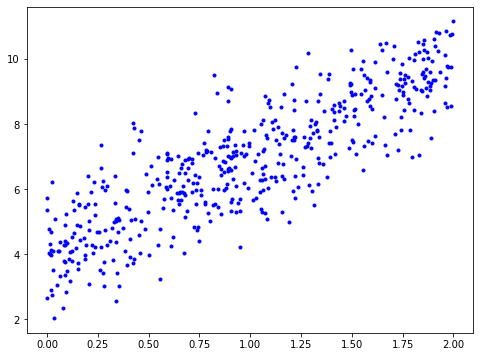

In [4]:
plt.figure(figsize=[8,6])
plt.plot(X, y, "b.")
plt.show()

In [5]:
# Finding the theta best manually

def normal_lin_reg(X, y):
  X = np.c_[np.ones((X.shape[0], 1)), X]
  X_transposed = X.T
  XTX = X_transposed.dot(X)
  inverted = np.linalg.inv(XTX)
  theta_best = inverted.dot(X_transposed).dot(y)

  return theta_best

In [6]:
theta_best = normal_lin_reg(X, y)
theta_best

array([[4.03730894],
       [2.88517424]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.04485881],
       [10.06699734]])

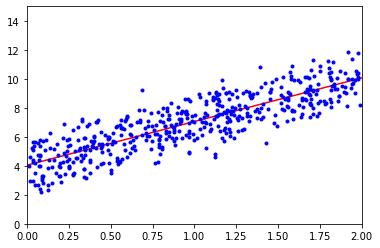

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# Sklearn function to get theta best 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([4.03730894]), array([[2.88517424]]))

In [ ]:
y_pred = lin_reg.predict(X_new)
y_pred

array([[ 4.04485881],
       [10.06699734]])

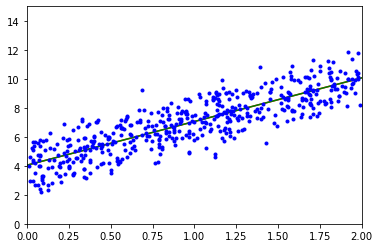

In [ ]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X_new, y_pred, "g-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

###2: Gradient Descendent

In [11]:
def f(x):
  return x**2

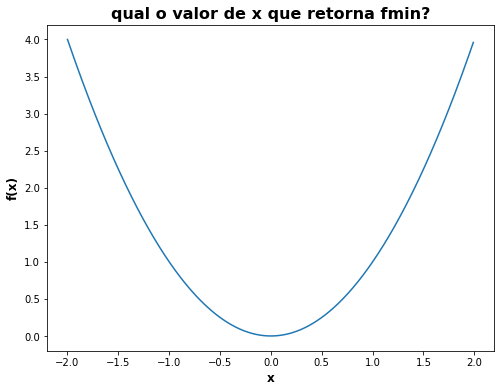

In [12]:
xlims = np.arange(-2, 2, 0.01)
fxlims = [f(x) for x in xlims]

plt.figure(figsize=[8,6])
plt.title('qual o valor de x que retorna fmin?', fontsize=16, fontweight='bold')
plt.xlabel('x', fontsize=12, fontweight='bold')
plt.ylabel('f(x)', fontsize=12, fontweight='bold')
plt.plot(xlims, fxlims, '-')
plt.show()

In [13]:
def learning_rate_steps(learning_rate=0.25, num_steps=10, initial_x=np.random.rand()):
  def gradient_f(x):
    return 2*x

  def f(x):
    return x**2

  x_final = None

  for step in range(num_steps):
    if step == 0:
      x_final = initial_x
    else:
      x_final = x_final - learning_rate * gradient_f(x_final)
    print(f"Step {step} | x: {x_final} | f(x): {f(x_final)}")

In [14]:
learning_rate_steps(initial_x=1.789)

Step 0 | x: 1.789 | f(x): 3.2005209999999997
Step 1 | x: 0.8945 | f(x): 0.8001302499999999
Step 2 | x: 0.44725 | f(x): 0.20003256249999998
Step 3 | x: 0.223625 | f(x): 0.050008140624999996
Step 4 | x: 0.1118125 | f(x): 0.012502035156249999
Step 5 | x: 0.05590625 | f(x): 0.0031255087890624997
Step 6 | x: 0.027953125 | f(x): 0.0007813771972656249
Step 7 | x: 0.0139765625 | f(x): 0.00019534429931640623
Step 8 | x: 0.00698828125 | f(x): 4.883607482910156e-05
Step 9 | x: 0.003494140625 | f(x): 1.220901870727539e-05


In [ ]:
learning_rate_steps()

Step 0 | x: 0.9204472752161786 | f(x): 0.8472231864528877
Step 1 | x: 0.4602236376080893 | f(x): 0.21180579661322194
Step 2 | x: 0.23011181880404466 | f(x): 0.052951449153305484
Step 3 | x: 0.11505590940202233 | f(x): 0.013237862288326371
Step 4 | x: 0.057527954701011165 | f(x): 0.0033094655720815928
Step 5 | x: 0.028763977350505582 | f(x): 0.0008273663930203982
Step 6 | x: 0.014381988675252791 | f(x): 0.00020684159825509955
Step 7 | x: 0.007190994337626396 | f(x): 5.171039956377489e-05
Step 8 | x: 0.003595497168813198 | f(x): 1.2927599890943722e-05
Step 9 | x: 0.001797748584406599 | f(x): 3.2318999727359304e-06


In [ ]:
1.220901870727539e-05 < 0.0001

True

In [ ]:
learning_rate_steps(0.01, 100)

Step 0 | x: 0.9204472752161786 | f(x): 0.8472231864528877
Step 1 | x: 0.902038329711855 | f(x): 0.8136731482693533
Step 2 | x: 0.8839975631176179 | f(x): 0.7814516915978869
Step 3 | x: 0.8663176118552656 | f(x): 0.7505062046106106
Step 4 | x: 0.8489912596181602 | f(x): 0.7207861589080303
Step 5 | x: 0.8320114344257971 | f(x): 0.6922430270152724
Step 6 | x: 0.8153712057372812 | f(x): 0.6648302031454677
Step 7 | x: 0.7990637816225356 | f(x): 0.6385029271009072
Step 8 | x: 0.7830825059900849 | f(x): 0.6132182111877114
Step 9 | x: 0.7674208558702832 | f(x): 0.588934770024678
Step 10 | x: 0.7520724387528775 | f(x): 0.5656129531317008
Step 11 | x: 0.73703098997782 | f(x): 0.5432146801876855
Step 12 | x: 0.7222903701782636 | f(x): 0.521703378852253
Step 13 | x: 0.7078445627746983 | f(x): 0.5010439250497039
Step 14 | x: 0.6936876715192043 | f(x): 0.4812025856177355
Step 15 | x: 0.6798139180888202 | f(x): 0.4621469632272731
Step 16 | x: 0.6662176397270438 | f(x): 0.44384594348347317
Step 17 | x

In [ ]:
learning_rate_steps(2, 10)

Step 0 | x: 0.9204472752161786 | f(x): 0.8472231864528877
Step 1 | x: -2.761341825648536 | f(x): 7.62500867807599
Step 2 | x: 8.284025476945608 | f(x): 68.62507810268391
Step 3 | x: -24.852076430836824 | f(x): 617.6257029241552
Step 4 | x: 74.55622929251047 | f(x): 5558.631326317395
Step 5 | x: -223.6686878775314 | f(x): 50027.68193685656
Step 6 | x: 671.0060636325942 | f(x): 450249.13743170904
Step 7 | x: -2013.0181908977825 | f(x): 4052242.236885381
Step 8 | x: 6039.054572693347 | f(x): 36470180.13196842
Step 9 | x: -18117.16371808004 | f(x): 328231621.18771577


In [ ]:
X.shape, y.shape

((500, 1), (500, 1))

In [ ]:
from sklearn.metrics import mean_squared_error

def mse(ytrue, ypred):
  return mean_squared_error(y_true=ytrue, y_pred=ypred)

In [ ]:
learning_rate = 0.0075
num_steps = 200

m = X.shape[0]
k = X.shape[1]

theta = np.random.randn(k + 1, 1)
X_b = np.c_[np.ones((m, 1)), X]

for step in range(num_steps):
  print(f'step: {step}')
  print(f'theta: {theta.reshape(-1, 1)}')

  gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)

  theta = theta - learning_rate * gradients

  ypred_step = X_b.dot(theta)
  mse_step = mse(y, ypred_step)

  print(f'MSE: {mse_step}')
  print('-'*60)

step: 0
theta: [[0.74264957]
 [0.60320924]]
MSE: 32.53064248581662
------------------------------------------------------------
step: 1
theta: [[0.82708123]
 [0.69632125]]
MSE: 30.58593557881393
------------------------------------------------------------
step: 2
theta: [[0.90889689]
 [0.78645967]]
MSE: 28.761835544454883
------------------------------------------------------------
step: 3
theta: [[0.98817889]
 [0.87371832]]
MSE: 27.05086076661093
------------------------------------------------------------
step: 4
theta: [[1.06500696]
 [0.95818802]]
MSE: 25.44599374514148
------------------------------------------------------------
step: 5
theta: [[1.13945835]
 [1.03995676]]
MSE: 23.94065230479734
------------------------------------------------------------
step: 6
theta: [[1.21160784]
 [1.11910974]]
MSE: 22.52866259015905
------------------------------------------------------------
step: 7
theta: [[1.28152788]
 [1.19572949]]
MSE: 21.204233735814615
-----------------------------------

In [15]:
normal_lin_reg(X, y)

array([[4.03730894],
       [2.88517424]])

##3: LinReg

In [23]:
class regLinear():
  def __init__(self, learning_rate, num_steps):
    self.learning_rate = learning_rate
    self.num_steps = num_steps

  def fit(self, X, y):
    y = y.reshape(-1, 1)
    m = X.shape[0]
    k = X.shape[1]
    theta = np.random.randn(k + 1, 1)
    X_b = np.c_[np.ones((m, 1)), X]

    for step in range(self.num_steps):
      gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
      theta = theta - self.learning_rate * gradients

    self.final_theta = theta
    print('Model trained')

  def predict(self, X):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    preds = X_b.dot(self.final_theta)
    return preds


In [24]:
rg = regLinear(learning_rate=0.075, num_steps=200)

In [25]:
rg.fit(X, y)

Model trained


In [26]:
rg.final_theta

array([[4.02330754],
       [2.89724066]])

In [27]:
rg.predict(X)

array([[8.62782169],
       [9.05880853],
       [6.64357144],
       [5.98248965],
       [4.29324263],
       [9.12479356],
       [4.13161917],
       [4.34599334],
       [5.98825441],
       [5.94304313],
       [8.60956848],
       [7.8817555 ],
       [6.09266025],
       [4.31364013],
       [8.34077872],
       [5.89782181],
       [5.25522005],
       [5.26132158],
       [9.55396424],
       [6.60961061],
       [4.07148763],
       [7.69555019],
       [6.19174369],
       [9.03977287],
       [9.12279569],
       [8.80551937],
       [7.57255678],
       [4.73493908],
       [8.58872037],
       [6.4874332 ],
       [8.25700114],
       [4.28191765],
       [9.4838251 ],
       [7.3122574 ],
       [9.54307142],
       [4.56498843],
       [7.89486861],
       [6.10135129],
       [6.54182502],
       [8.41419687],
       [8.95783682],
       [5.95317865],
       [9.19954457],
       [5.05646986],
       [9.18999647],
       [4.79852331],
       [8.82199296],
       [9.397

In [28]:
lm = LinearRegression()
lm.fit(X, y)

print(lm.intercept_, lm.coef_)
print()
lm.predict(X)

[4.03730894] [[2.88517424]]



array([[8.62264621],
       [9.05183808],
       [6.64665997],
       [5.98833144],
       [4.3061198 ],
       [9.1175483 ],
       [4.14516946],
       [4.35865081],
       [5.9940722 ],
       [5.94904921],
       [8.60446903],
       [7.87968723],
       [6.09804321],
       [4.32643235],
       [8.33679872],
       [5.90401623],
       [5.26409077],
       [5.27016689],
       [9.54493157],
       [6.61284058],
       [4.08528836],
       [7.69425743],
       [6.19671399],
       [9.0328817 ],
       [9.11555874],
       [8.79960381],
       [7.57177627],
       [4.74597667],
       [8.58370774],
       [6.49117201],
       [8.25337005],
       [4.29484198],
       [9.47508454],
       [7.31256098],
       [9.53408411],
       [4.57673383],
       [7.89274574],
       [6.10669805],
       [6.54533729],
       [8.4099111 ],
       [8.95128689],
       [5.95914251],
       [9.19198798],
       [5.06616834],
       [9.18247964],
       [4.80929609],
       [8.81600879],
       [9.388

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, eta0=0.1, max_iter=50)
sgd_reg.fit(X, y)

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.99249351]), array([2.88480384]))

##4: Polinomial Regression

In [31]:
def geraDados():
  m = 100
  X = 6 * np.random.rand(m, 1) - 3
  X = np.sort(X.reshape(-1,)).reshape(-1, 1)
  y = 0.5 * X **2 + X + 2 + np.random.randn(m, 1)

  return X, y

In [34]:
X, y = geraDados()
X.shape, y.shape

((100, 1), (100, 1))

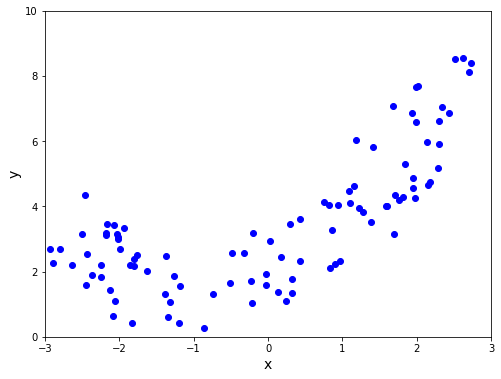

In [35]:
plt.figure(figsize=[8,6])
plt.scatter(X, y, c='blue')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.axis([-3, 3, 0 , 10])
plt.show()

In [36]:
lm = LinearRegression().fit(X, y)

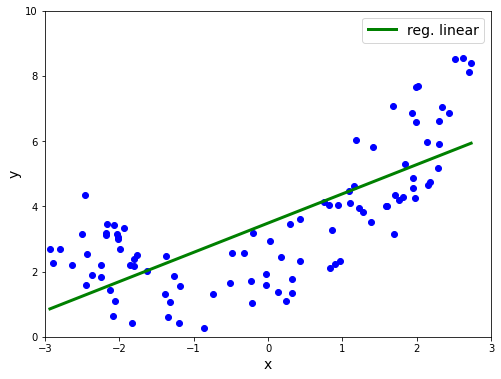

In [37]:
plt.figure(figsize=[8,6])
plt.scatter(X, y, c='blue')
plt.plot(X, lm.predict(X), c='green', label='reg. linear', lw=3)
plt.legend(fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.axis([-3, 3, 0 , 10])
plt.show()

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [41]:
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 2)

In [42]:
X_poly[:10]

array([[-2.93131796,  8.59262497],
       [-2.89538611,  8.38326072],
       [-2.80062094,  7.84347765],
       [-2.63575986,  6.94723002],
       [-2.50218662,  6.2609379 ],
       [-2.45978993,  6.05056648],
       [-2.44987365,  6.00188092],
       [-2.43960033,  5.95164977],
       [-2.36837367,  5.60919384],
       [-2.24273293,  5.02985101]])

In [43]:
poly_fit = LinearRegression()
poly_fit.fit(X_poly, y)

poly_fit.intercept_, poly_fit.coef_

(array([2.00493779]), array([[0.974878  , 0.48683932]]))

In [46]:
y_new = poly_fit.predict(X_poly)

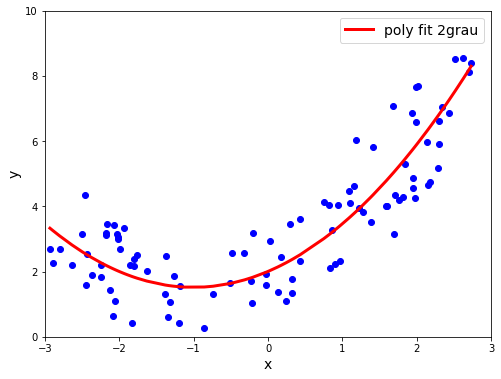

In [47]:
plt.figure(figsize=[8,6])
plt.scatter(X, y, c='blue')
plt.plot(X, y_new, c='red', label='poly fit 2grau', lw=3)
plt.legend(fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.axis([-3, 3, 0 , 10])
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [50]:
def polyFit(X, y, grau):
  poylbig_features = PolynomialFeatures(degree=grau, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()

  polynomial_regressor = Pipeline([
                                   ('poly_features', poylbig_features),
                                   ('std_scaler', std_scaler),
                                   ('lin_reg', lin_reg),
  ])

  polynomial_regressor.fit(X, y)
  return polynomial_regressor

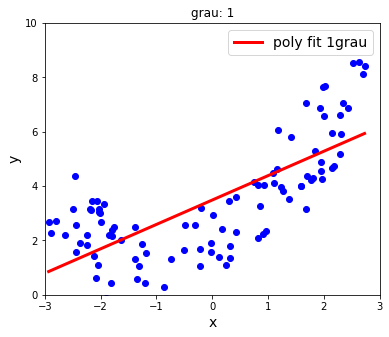

RMSE: 1.5364913793379749
------------------------------------------------------------



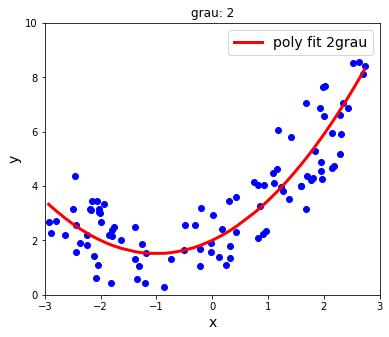

RMSE: 1.07610320133259
------------------------------------------------------------



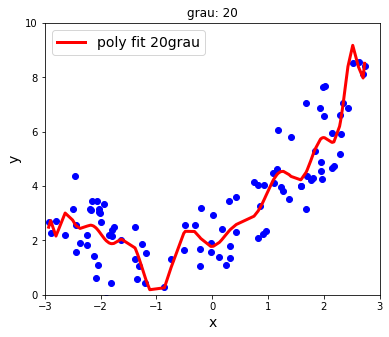

RMSE: 0.9686024908529128
------------------------------------------------------------



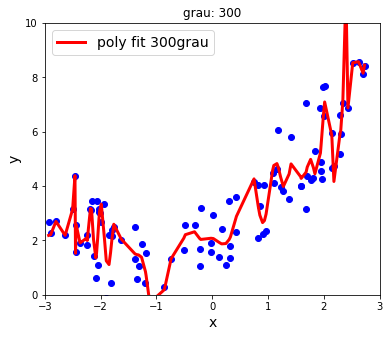

RMSE: 0.7369198052370123
------------------------------------------------------------


In [58]:
for grau in [1,2,20,300]:
  print()

  polyfit = polyFit(X, y, grau)

  ypoly = polyfit.predict(X)

  plt.figure(figsize=[6,5])
  plt.scatter(X, y, c='blue')
  plt.plot(X, ypoly, c='red', label=f'poly fit {grau}grau', lw=3)
  plt.legend(fontsize=14)
  plt.xlabel('x', fontsize=14)
  plt.ylabel('y', fontsize=14)
  plt.title(f'grau: {grau}')
  plt.axis([-3, 3, 0 , 10])
  plt.show()

  print(f'RMSE: {np.sqrt(np.mean(np.square(y - ypoly)))}')
  print('-' * 60)


##5: Regularization


In [60]:
from sklearn.linear_model import Ridge, Lasso

In [63]:
def polyFitReg(X, y, grau, base_model, base_model_name):
  poylbig_features = PolynomialFeatures(degree=grau, include_bias=False)
  std_scaler = StandardScaler()
  basemodel = base_model

  polynomial_regressor = Pipeline([
                                   ('poly_features', poylbig_features),
                                   ('std_scaler', std_scaler),
                                   (base_model_name, basemodel),
  ])

  polynomial_regressor.fit(X, y)
  return polynomial_regressor

Ridge_alpha: 0


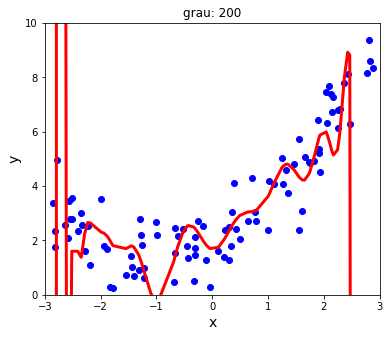

RMSE (treino): 0.9312956647938744
RMSE (teste): 20339.979536065173
20340.91083172997
------------------------------------------------------------
Ridge_alpha: 0.001


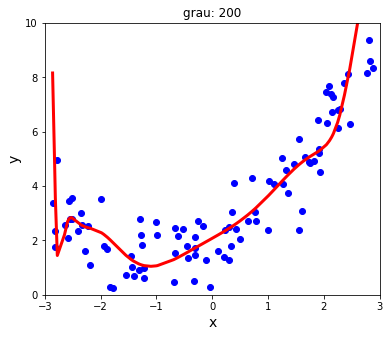

RMSE (treino): 1.0198034154806164
RMSE (teste): 11.600077345605007
12.619880761085623
------------------------------------------------------------
Ridge_alpha: 0.01


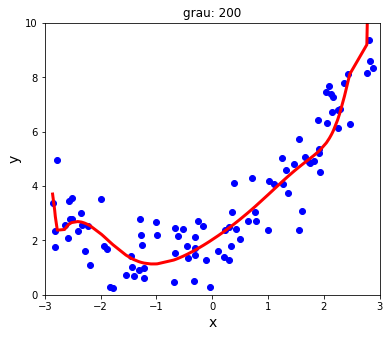

RMSE (treino): 1.0263822342997593
RMSE (teste): 5.0394971067022105
6.06587934100197
------------------------------------------------------------
Ridge_alpha: 1


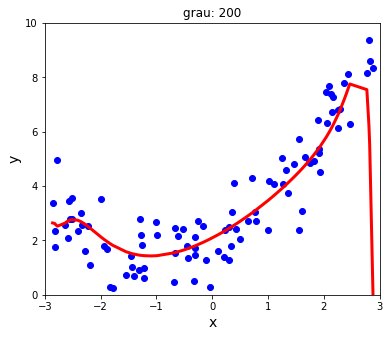

RMSE (treino): 1.0446171418504695
RMSE (teste): 1.4142001539584448
2.458817295808914
------------------------------------------------------------
Ridge_alpha: 10


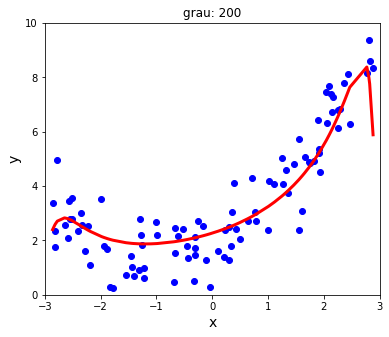

RMSE (treino): 1.0880386697430067
RMSE (teste): 1.127522004064335
2.2155606738073415
------------------------------------------------------------
Ridge_alpha: 100


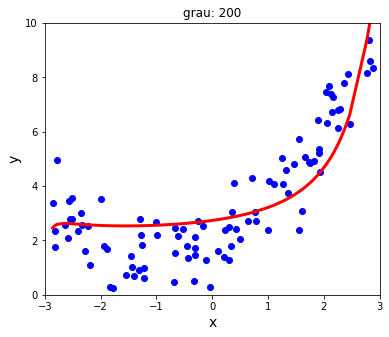

RMSE (treino): 1.2941393547141504
RMSE (teste): 1.3224291064394242
2.616568461153575
------------------------------------------------------------
Ridge_alpha: 10000


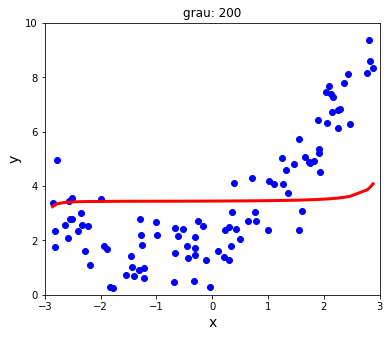

RMSE (treino): 2.1385840144382624
RMSE (teste): 2.1206795937567655
4.2592636081950275
------------------------------------------------------------


In [71]:
grau = 200
Xnovo, ynovo = geraDados()

for alpha in [0, 0.001, 0.01, 1, 10, 100, 10000]:
  model_name = 'Ridge_alpha: ' + str(alpha)
  polyfit = polyFitReg(X,
                       y, 
                       grau, 
                       base_model = Ridge(alpha=alpha),
                       base_model_name = model_name)
  
  ypoly_novo = polyfit.predict(Xnovo)

  print(model_name)
  plt.figure(figsize=[6,5])
  plt.scatter(Xnovo, ynovo, c='blue')
  plt.plot(Xnovo, ypoly_novo, c='red', label=f'poly fit {grau}grau', lw=3)
  plt.xlabel('x', fontsize=14)
  plt.ylabel('y', fontsize=14)
  plt.title(f'grau: {grau}')
  plt.axis([-3, 3, 0 , 10])
  plt.show()

  train_error = np.sqrt(np.mean(np.square(y - polyfit.predict(X))))
  test_error = np.sqrt(np.mean(np.square(y - polyfit.predict(Xnovo))))

  print(f'RMSE (treino): {train_error}')
  print(f'RMSE (teste): {test_error}')

  print(f'{train_error-test_error*-1}')

  print('-' * 60)

In [73]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82785875]])

In [74]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.78832093])

##6: Logistic Regression

In [75]:
from sklearn.datasets import make_blobs

def geraDados2(size):
  X, y = make_blobs(n_samples=size, n_features=2, centers=[[0,0], [1,0]], cluster_std=0.25)
  y = y.reshape(-1, 1)

  return X, y

In [76]:
X, y = geraDados2(400)

In [77]:
X.shape, y.shape

((400, 2), (400, 1))

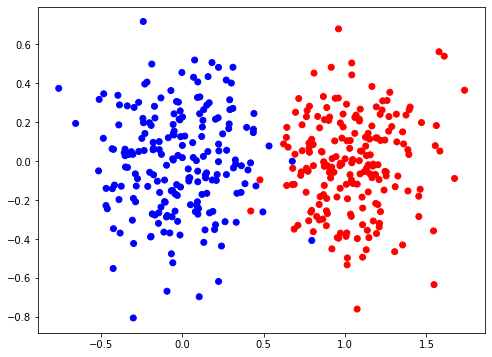

In [78]:
plt.figure(figsize=[8,6])
plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1,), cmap=plt.cm.bwr)
plt.show()

In [82]:
def logLossCost(ytrue, ypred_probs):
  return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [80]:
def sigmoid(t):
  return 1 / (1 + np.exp(-t))

In [83]:
learning_rate = 0.01
n_steps = 100

X_b = np.c_[np.ones(X.shape[0]), X]
theta = np.random.randn(X_b.shape[1], 1)

for step in range(n_steps):
  print(f'Step: {step}')
  print(f'Theta: {theta.reshape(-1,)}')

  #Calculando a probabilidade
  yscores = sigmoid(X_b.dot(theta))

  #Calculando o gradiente do logloss
  gradient = X_b.T.dot(yscores -y)

  #Atualizando os pesos
  theta = theta - learning_rate * gradient

  #Calculando o logloss nos passos
  logloss_step = logLossCost(y, yscores)

  #Printa as informações
  print(f'LogLoss: {logloss_step}')
  print('-' * 60)

theta_final = theta

Step: 0
Theta: [ 0.09988637 -1.07524231 -0.22947214]
LogLoss: 1.0503449569630916
------------------------------------------------------------
Step: 1
Theta: [ 0.50039917  0.53285527 -0.23447324]
LogLoss: 0.6345575162557721
------------------------------------------------------------
Step: 2
Theta: [-0.22135769  1.07237087 -0.22624706]
LogLoss: 0.46782846424822777
------------------------------------------------------------
Step: 3
Theta: [-0.51745699  1.64232032 -0.22142141]
LogLoss: 0.3759836199247005
------------------------------------------------------------
Step: 4
Theta: [-0.77948144  2.07597974 -0.21763316]
LogLoss: 0.31766209164532855
------------------------------------------------------------
Step: 5
Theta: [-0.98800071  2.43671059 -0.21496455]
LogLoss: 0.27762441719986475
------------------------------------------------------------
Step: 6
Theta: [-1.16353861  2.74372076 -0.21306143]
LogLoss: 0.24844560201568888
------------------------------------------------------------
St

In [84]:
probs = sigmoid(X_b.dot(theta_final))
probs

array([[8.75161409e-03],
       [4.44847024e-04],
       [9.99704039e-01],
       [2.68889357e-01],
       [9.40753627e-01],
       [9.81311594e-01],
       [4.12684538e-01],
       [9.63211138e-01],
       [9.98929694e-01],
       [1.02638389e-01],
       [7.96459475e-01],
       [9.98442859e-01],
       [9.99970499e-01],
       [1.26541116e-04],
       [1.60100480e-01],
       [1.04835226e-02],
       [7.00465492e-02],
       [9.86815237e-01],
       [9.76606880e-01],
       [1.48582618e-03],
       [9.92868191e-01],
       [9.96861872e-01],
       [9.99696940e-01],
       [9.63984715e-01],
       [8.63316414e-01],
       [9.90913809e-01],
       [3.43279476e-03],
       [3.22102178e-03],
       [9.53750592e-01],
       [9.99872437e-01],
       [9.97594031e-01],
       [4.74577188e-02],
       [9.22339283e-01],
       [1.45998003e-05],
       [8.29744674e-04],
       [9.99453569e-01],
       [8.36806542e-03],
       [3.21102059e-01],
       [9.84821431e-01],
       [9.88143280e-01],


In [87]:
limiar = 0.5
ypred = np.where(probs > limiar, 1, 0)
ypred

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, ypred)

array([[197,   3],
       [  2, 198]])